In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-05-01 17:11:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70%  145K 0s
    50K .......... ..........                                 100% 17.9M=0.3s

2021-05-01 17:11:34 (205 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [5]:
df=pd.read_csv("FuelConsumption.csv")
df.shape # a tuple
df.describe() # description of df

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


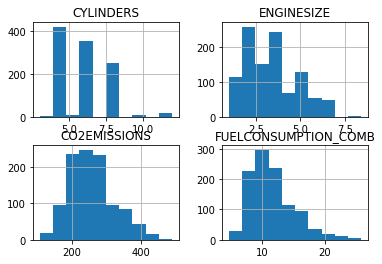

In [6]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]  # just changed the order
viz.hist()
plt.show()
plt.show()
# cdf

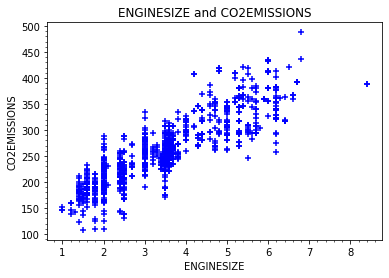

In [7]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,marker="+",color="b")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("ENGINESIZE and CO2EMISSIONS")
plt.minorticks_on()
plt.show()

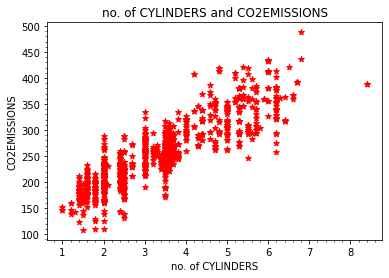

In [10]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,marker="*",color="r")
plt.xlabel("no. of CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.title("no. of CYLINDERS and CO2EMISSIONS")
plt.minorticks_on()
plt.show()

In [11]:
train=df[0:500]
test=df[500:]

coefficient is  39.85684336494418 and intercept is  124.62402240672219


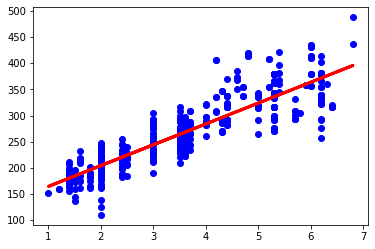

In [14]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
print("coefficient is ",regr.coef_[0][0],"and intercept is ",regr.intercept_[0])
# coef_ is a 2D array while intercept is a 1D array
# plt.scatter(train,train_y) is wrong as both arguments need to be either a 1d array or a 2d array of no. of columns as 1
plt.scatter(train_x,train_y,color="b")
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],linewidth=3,color="r") 

In [65]:
train.ENGINESIZE # gives a 1D array same as train["ENGINESIZE"]

0      2.0
1      2.4
2      1.5
3      3.5
4      3.5
      ... 
495    1.5
496    1.5
497    1.5
498    3.5
499    3.5
Name: ENGINESIZE, Length: 500, dtype: float64

In [66]:
train[["ENGINESIZE"]]  # gives a 2D array

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
495,1.5
496,1.5
497,1.5
498,3.5


In [15]:
from sklearn.metrics import *
test_x=test[["ENGINESIZE"]]
test_y=test[["CO2EMISSIONS"]]
test_y_=regr.predict(test_x) 
print("MAE IS %0.2f" %np.mean(np.absolute(test_y-test_y_)))
print("MSE IS %0.2f" %np.mean(np.absolute(test_y-test_y_)**2))
# parametrs of regr.fit and regr.predict must be 2D arrays
print("r2_score is %0.2f" %r2_score(test_y,test_y_))
# keep order actual,predicted always

MAE IS 22.66
MSE IS 885.40
r2_score is 0.74


In [18]:
regr.predict([[500]]) 
# regr.predict([500]) is wrong

array([[20053.04570488]])

In [21]:
regr.score(test_x,test_y)

0.7364477910502375